In [1]:
%matplotlib inline
import numpy as np

import xml.etree.ElementTree as et
import os

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
ang_2_bohr = 1.0/0.52917721067
hart_2_ev = 27.21138602

In [2]:
username='jbachmann'

In [3]:
def read_band_data_xml(xml_file):
    """
    Reads data from QE bands calculations (new XML)
    Returns:
      - kpts[i_kpt] = [kx, ky, kz] in [2*pi/a]
      - eigvals[i_kpt, i_band] in [eV]
      - fermi_en in [eV]
    """

    data_file_xml = et.parse(xml_file)
    data_file_root = data_file_xml.getroot()

    output_node = data_file_root.find('output')

    # Find fermi
    band_node = output_node.find('band_structure')
    fermi_en = float(band_node.find('fermi_energy').text)*27.21138602
    lsda = band_node.find('spinorbit').text

    kpts = []
    eigvals = []

    for kpt in band_node.findall("ks_energies"):
        k_coords = np.array(kpt.find('k_point').text.split(), dtype=float)
        kpts.append(k_coords)

        eig_vals = np.array(kpt.find('eigenvalues').text.split(), dtype=float)
        eigvals.append(eig_vals*27.21138602)
    kpts = np.array(kpts)
    eigvals = np.array(eigvals)

    return kpts, eigvals, fermi_en




# Si

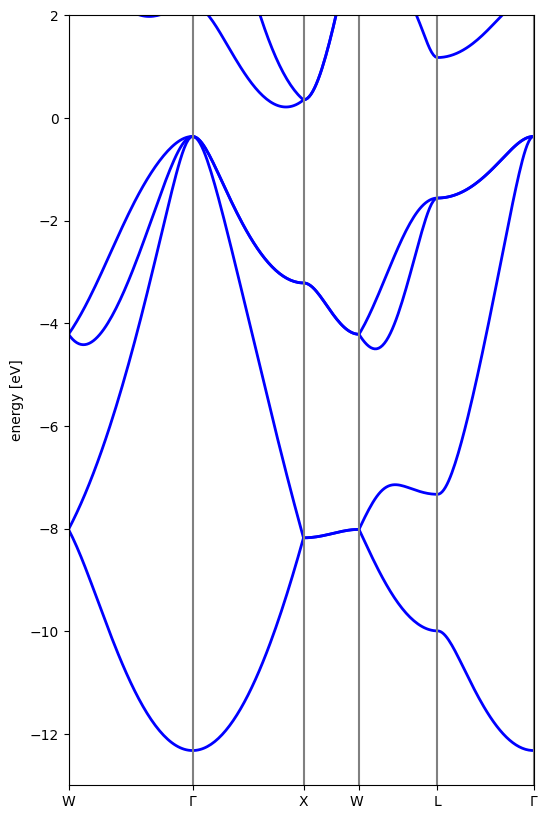

In [20]:
#set the correct path below
file_xml='/cluster/home/'+username+'/Molecular-and-Materials-Modelling-FS2023/exercise-5/Si/si.xml'
kpts, eigvals, fermi_en = read_band_data_xml(file_xml)

k_arr = [0.0]

cum_sum = 0.0
for i_k in range(1, len(kpts)):
    k0 = kpts[i_k-1]
    k1 = kpts[i_k]
    dk = k1 - k0
    cum_sum += np.linalg.norm(dk)
    k_arr.append(cum_sum)

x_ticks = {}
# W G X W L G   r'$\Gamma$'
for i_k, kpt in enumerate(kpts):
    if np.allclose(kpt, np.array([-1.0, 0.5, 0.0])):
        if 'W' in x_ticks:
            x_ticks['W '] = k_arr[i_k]
        else:
            x_ticks['W'] = k_arr[i_k]
    if np.allclose(kpt, np.array([0.0, 0.0, 0.0])):
        if r'$\Gamma$' in x_ticks:
            x_ticks[r'$\Gamma$ '] = k_arr[i_k]
        else:
            x_ticks[r'$\Gamma$'] = k_arr[i_k]
    if np.allclose(kpt, np.array([-1.0, 0.0, 0.0])):
        x_ticks['X'] = k_arr[i_k]
    if np.allclose(kpt, np.array([-0.5, 0.5, 0.5])):
        x_ticks['L'] = k_arr[i_k]

plt.figure(figsize=(6, 10))
plt.plot(k_arr, eigvals-fermi_en, 'b', lw=2.0)
plt.xlim([0.0, np.max(k_arr)])
#plt.ylim([np.min(eigvals-fermi_en), np.max(eigvals-fermi_en)])
plt.ylim(-13, 2)
plt.xticks(list(x_ticks.values()), list(x_ticks.keys()))
for xtick in list(x_ticks.values()):
    plt.axvline(xtick, color='gray')
plt.ylabel("energy [eV]")
plt.show()
#plt.savefig("./task3_bands.png", dpi=200)

# TASKs_3_4_5

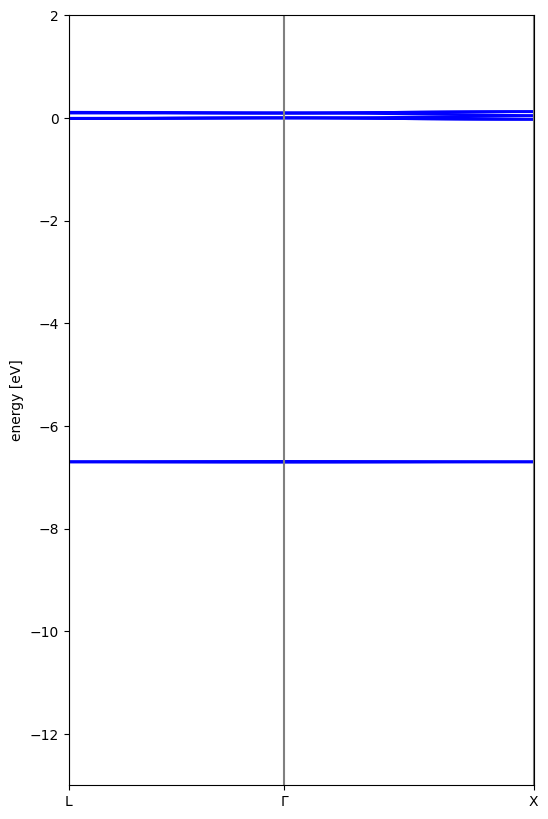

In [30]:
#set the correct path below
file_xml='/cluster/home/'+username+'/Molecular-and-Materials-Modelling-FS2023/exercise-5/TASK_4/SI.xml'
kpts, eigvals, fermi_en = read_band_data_xml(file_xml)

k_arr = [0.0]

cum_sum = 0.0
for i_k in range(1, len(kpts)):
    k0 = kpts[i_k-1]
    k1 = kpts[i_k]
    dk = k1 - k0
    cum_sum += np.linalg.norm(dk)
    k_arr.append(cum_sum)

x_ticks = {}

for i_k, kpt in enumerate(kpts):
    if np.allclose(kpt, np.array([0.0, 0.0, 0.0])):
        x_ticks[r'$\Gamma$'] = k_arr[i_k]
    if np.allclose(kpt, np.array([-0.5, 0.5, 0.5])):
        x_ticks['L'] = k_arr[i_k]
    if np.allclose(kpt, np.array([0.5, 0.5, 0.5])):
        x_ticks['L '] = k_arr[i_k]
    if np.allclose(kpt, np.array([-1.0, 0.0, 0.0])):
        x_ticks['X'] = k_arr[i_k]
    if np.allclose(kpt, np.array([0.5, 0.0, 0.5])):
        x_ticks['X '] = k_arr[i_k]

plt.figure(figsize=(6, 10))
plt.plot(k_arr, eigvals-fermi_en, 'b', lw=2.0)
plt.xlim([0.0, np.max(k_arr)])
#plt.ylim([np.min(eigvals-fermi_en), np.max(eigvals-fermi_en)])
plt.ylim(-13, 2)
plt.xticks(list(x_ticks.values()), list(x_ticks.keys()))
for xtick in list(x_ticks.values()):
    plt.axvline(xtick, color='gray')
plt.ylabel("energy [eV]")
plt.show()
#plt.savefig("./task4_bands.png", dpi=200)

# TASK_6_7

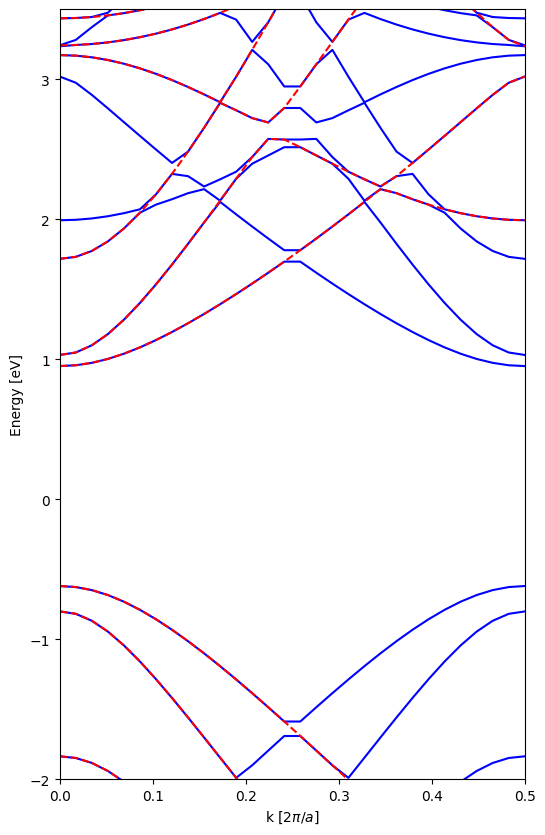

In [31]:
plt.figure(figsize=(6, 10))

additional_xml=None
file_xml='/cluster/home/'+username+'/Molecular-and-Materials-Modelling-FS2023/exercise-5/TASK_6/7agnr_1uc.xml'
additional_xml='/cluster/home/'+username+'/Molecular-and-Materials-Modelling-FS2023/exercise-5/TASK_7/7agnr_2uc.xml'

fold=1

emin=-2
emax=3.5

if additional_xml != None:
    fold=2
    kpts2, bands2, fermi_en2 = read_band_data_xml(additional_xml)
    bands2 -= -3#fermi_en2

    for i_band2 in range(bands2.shape[1]):
        plt.plot(kpts2[:, 0]/fold, bands2[:, i_band2], '-', color='b')

kpts, bands, fermi_en = read_band_data_xml(file_xml)
bands -= -3#fermi_en
for i_band in range(bands.shape[1]):
    plt.plot(kpts[:, 0], bands[:, i_band], '--', color='r')

plt.ylim([emin, emax])
plt.xlim([np.min(kpts[:, 0]), np.max(kpts[:, 0])])

plt.ylabel("Energy [eV]")
plt.xlabel(r"k [$2\pi /a$]")

# Make a suitable name
name = os.path.basename(file_xml)
name = name.split('.')[0]
if additional_xml != None:
    add_name = os.path.basename(additional_xml)
    add_name = add_name.split('.')[0]
    name += "-" + add_name

plt.savefig("./%s.png"%name, dpi=300)
plt.show()
plt.close()

# Assignement 2

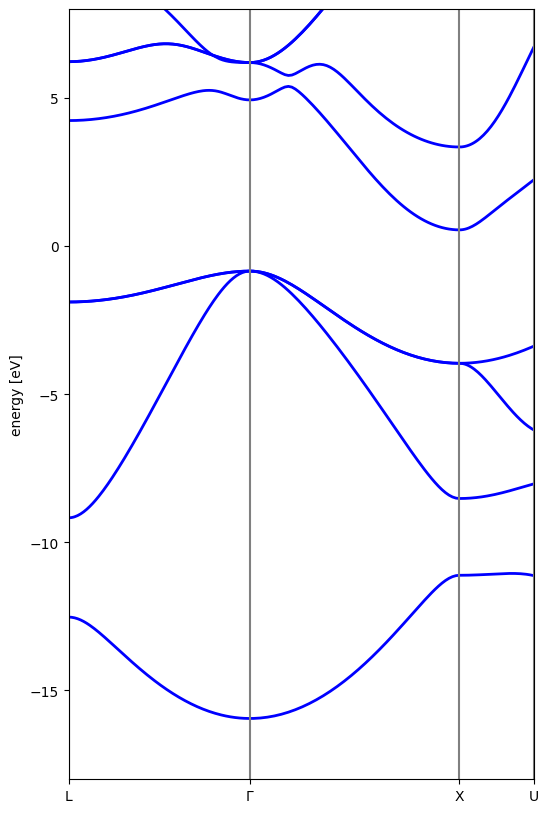

In [35]:
#set the correct path below
file_xml='/cluster/home/'+username+'/Molecular-and-Materials-Modelling-FS2023/exercise-5/SiC/out/sic.xml'
kpts, eigvals, fermi_en = read_band_data_xml(file_xml)

k_arr = [0.0]

cum_sum = 0.0
for i_k in range(1, len(kpts)):
    k0 = kpts[i_k-1]
    k1 = kpts[i_k]
    dk = k1 - k0
    cum_sum += np.linalg.norm(dk)
    k_arr.append(cum_sum)

x_ticks = {}

for i_k, kpt in enumerate(kpts):
    if np.allclose(kpt, np.array([0.0, 0.0, 0.0])):
        x_ticks[r'$\Gamma$'] = k_arr[i_k]
    if np.allclose(kpt, np.array([-0.5, 0.5, 0.5])):
        x_ticks['L'] = k_arr[i_k]
    if np.allclose(kpt, np.array([0.5, 0.5, 0.5])):
        x_ticks['L '] = k_arr[i_k]
    if np.allclose(kpt, np.array([-1.0, 0.0, 0.0])):
        x_ticks['X'] = k_arr[i_k]
    if np.allclose(kpt, np.array([0.5, 0.0, 0.5])):
        x_ticks['X '] = k_arr[i_k]
    if np.allclose(kpt, np.array([-1, 0.25, 0.25])):
        x_ticks['U'] = k_arr[i_k]

plt.figure(figsize=(6, 10))
plt.plot(k_arr, eigvals-fermi_en, 'b', lw=2.0)
plt.xlim([0.0, np.max(k_arr)])
#plt.ylim([np.min(eigvals-fermi_en), np.max(eigvals-fermi_en)])
plt.ylim(-18, 8)
plt.xticks(list(x_ticks.values()), list(x_ticks.keys()))
for xtick in list(x_ticks.values()):
    plt.axvline(xtick, color='gray')
plt.ylabel("energy [eV]")
#plt.show()
plt.savefig("./assignment.png", dpi=200)